# Homework: Notebooks to Illustrator

In this notebook you'll be building basic graphics which you'll then export to Illustrator and clean up. Overall I'll be looking at **your attention to detail** when accurately reproducing the graphics.

# Homework tips

## How to do this homework

**Start in pandas, [Altair](https://altair-viz.github.io/) or ggplot,** export to PDF or SVG, then move on over to Illustrator. 
- To [save in Altair](https://altair-viz.github.io/user_guide/saving_charts.html#png-svg-and-pdf-format), you'll need to install the `vl-convert-python` package
- If you're using ggplot, I recommend saving to PDF instead of SVG when using `ggsave`

**Do these in whatever order you'd like.** Feel free to do a bar graph, then skip ahead to some line graphs, etc.

**You choose when to leave the notebook.** I personally do the majority of my work in Illustrator, so as soon as I have all the bars and text I need I'm exporting and am on my way. But some folks might want to tweak axes, colors and alignment before exporting.

If the coding is too tough, don't worry! Just use DataWrapper and on the **Publish & Embed** step choose to export as PDF under **Export or duplicate visualization**.

While ChatGPT is great for tweaks before you head out to Illustrator, **remember how it can prevent you from *actually learning how to do things*.** You should always start from the [Altair examples page](https://altair-viz.github.io/), [python-graph-gallery](https://python-graph-gallery.com/), [r-graph-gallery](https://r-graph-gallery.com/), or [ggplot flipbook](https://evamaerey.github.io/ggplot_flipbook/ggplot_flipbook_xaringan.html). ChatGPT is most useful for things like formatting numbers on axes.

## Illustrator tips

Illustrator guides and videos are available in the homework assignment itself. The tips below are just a quick reference.

### Opening things in Illustrator

Select everything (Command+A) then `Object > Clipping Mask > Release` (Command + Option + 7) again and again and again until it doesn't work any more. Also do the same thing with `Object > Ungroup` (Command + Option + G).

### Fill vs. stroke colors

Fill is the inside, stroke is the outline.

![](images/fill-stroke.png)

You select them separately. The white-with-a-red-line color means no color.

### Background colors

In Illustrator, draw a square as big as your entire artboard, then do `Select > Arrange > Send to Back` to make it go behind everything else.

### Editing lines

`Window > Stroke` to open up the stroke menu, then you can change the size with "Weight" or make it dashed with "Dashed line" (you might need to click the little... thing in the upper right-hand corner of the Stroke window and pick 'Show options' to be able to see that)

![](images/stroke-stuff.png)

### Selecting multiple things in Illustrator

Hold shift, click multiple things. Or click and drag a box around them.

### Selecting all of the _____

Things that look like what you have selected: `Select > Same > Appearance` or `Fill Color` or `Stroke Color` or whatever

Text: `Select > Object > All Text Objects`

### My grid/axis lines are on top of my chart!

Select the line, then `Object > Arrange > Send to Back`

### I sent something to the back and it disappeared!!!

Maybe you have a white rectangle as a background? Try clicking the background and hitting delete.

### Rotating text or other things

Click it (black arrow), then move your mouse around its edge until you see a thing that kind of implies you can rotate it. Click and drag.

### Drawing straight lines or rotating nicely

Hold shift while you draw the line or rotate or move a thing and it will go straight.

### Lining up things

When you have multiple things selected, the `Align` bar becomes active at the top. You can... align things with other things using it instead of manually pushing things around. You might want to play around with the different "Align to..." options.

![](images/align.png)

The "key object" one can be pretty good, as it uses the "key object" as an anchor and moves everything around it. You select the key object by clicking (without holding shift) after you've made your selection. Key object = blue box.

----

# NYT: Bar graphs

Recreate the bar charts from [this piece](https://www.nytimes.com/2017/12/20/upshot/democrats-2018-congressional-elections-polling.html) and [this piece](https://www.nytimes.com/2017/12/27/business/the-robots-are-coming-and-sweden-is-fine.html) and [this piece](https://www.nytimes.com/2017/09/29/upshot/dont-forget-the-republicans-incumbency-advantage-in-2018.html). **Only the bar charts!**

![](images/sample-nyt.png)

I'm making you do three bar graphs because they each have a little something different about them: sorted or unsorted, stacked, or an additional piece of information beyond just the bar label.

**Data:** 
   
* `data/generic_poll_lead.csv`
* `data/social-spending.csv`
* `data/cook_pvi.csv`

# Graph 1 
https://www.nytimes.com/2017/12/20/upshot/democrats-2018-congressional-elections-polling.html

In [89]:
from plotnine import *
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

plt.rcParams['svg.fonttype'] = 'none'

In [90]:
df=pd.read_csv("data/generic_poll_lead.csv")
df.head()

,year,lead,in_power
0,2018,13.4,no
1,2016,1.2,yes
2,2014,3.0,yes
3,2012,1.5,no
4,2010,0.4,no


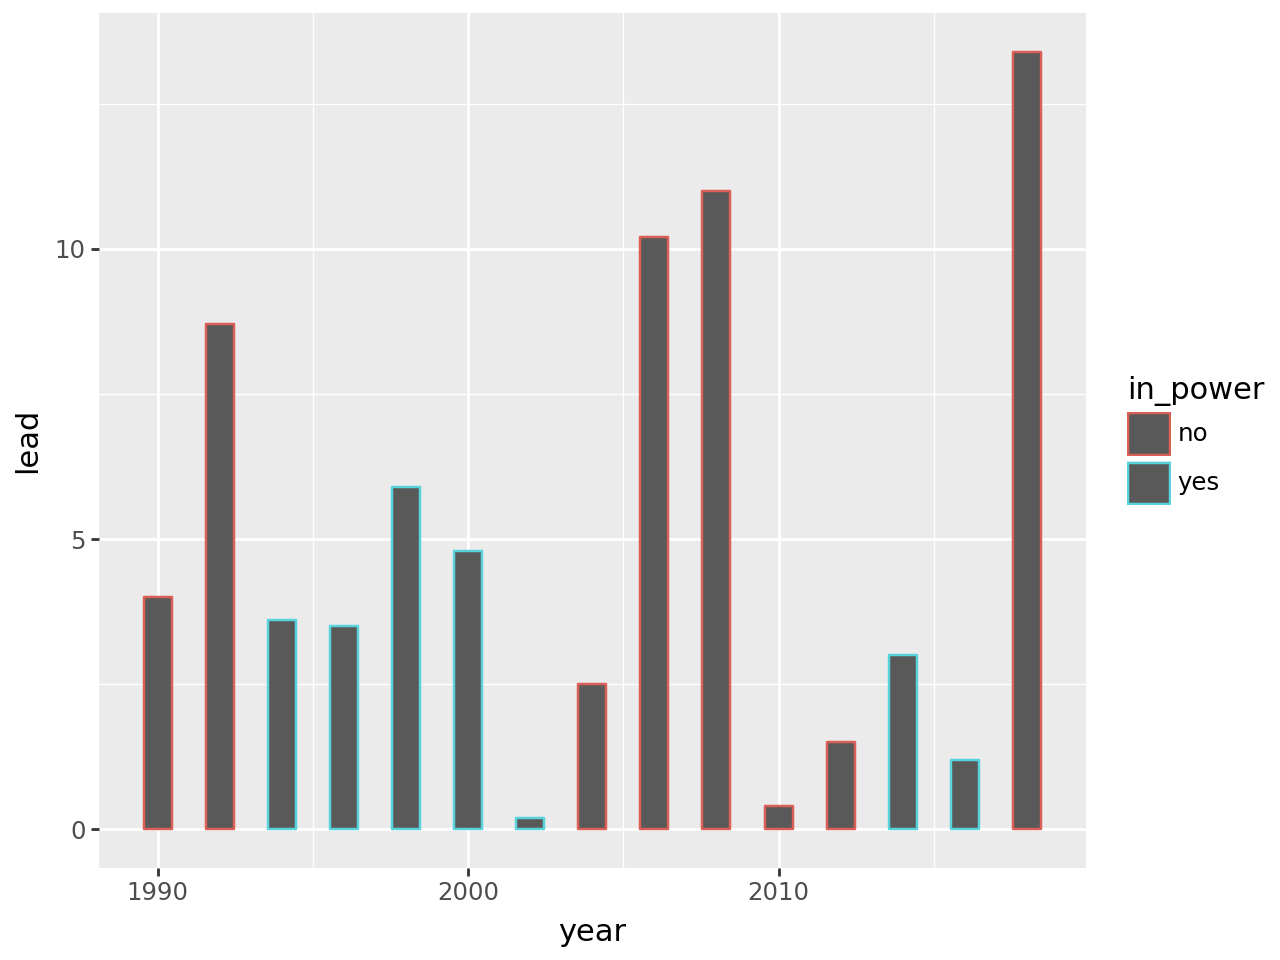

In [91]:
#make a bar graph
(
    ggplot(df)
    + aes(x='year', y='lead', color = 'in_power') + geom_bar(stat='identity')
)

/var/folders/bw/srjg9j8s4tz913lzdgv54j200000gn/T/ipykernel_81168/1651834018.py:9: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


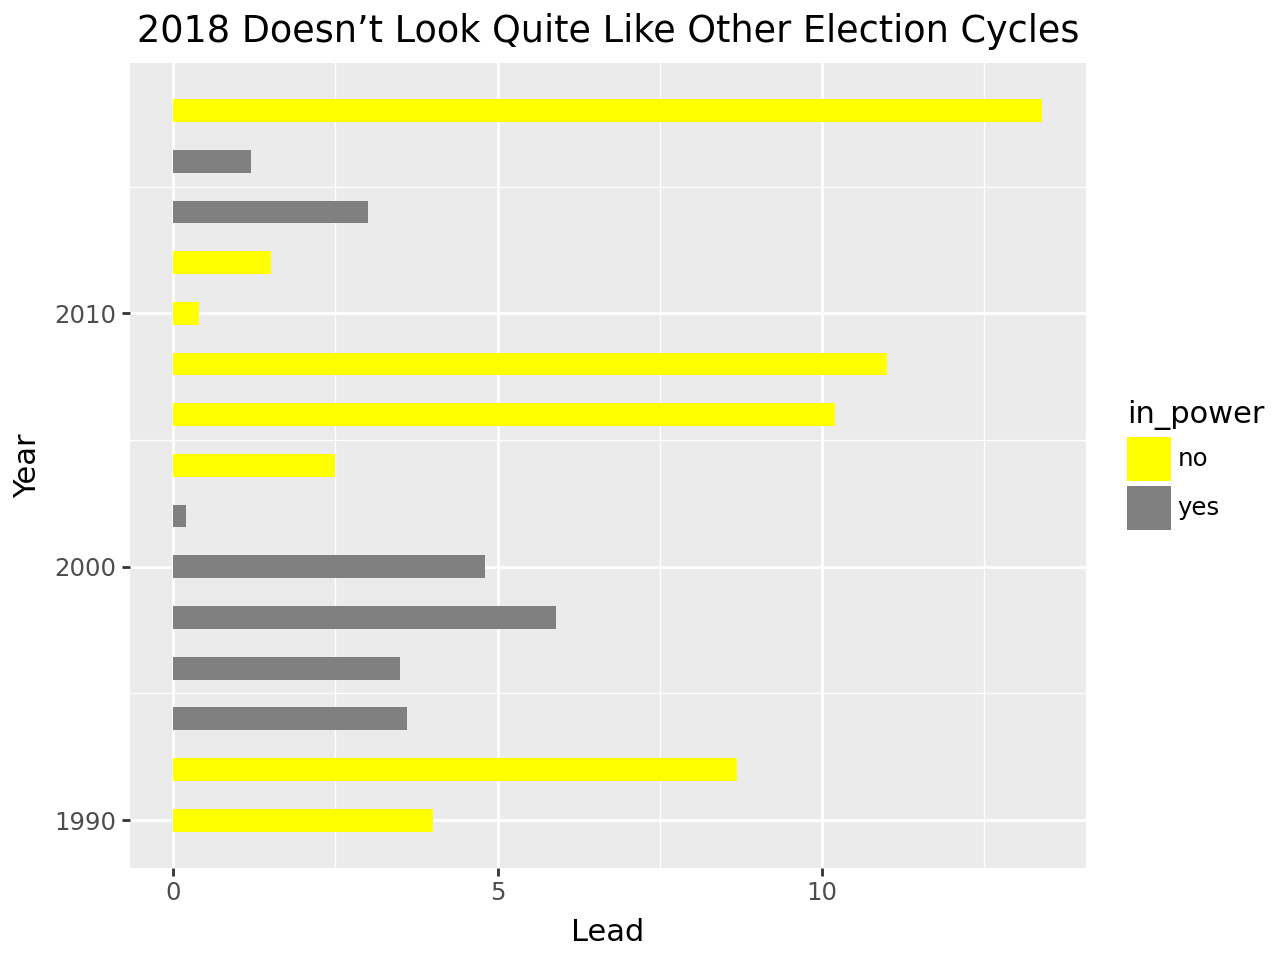

In [92]:
plot = (
ggplot(df, aes(x='year', y='lead', fill='in_power'))
    + geom_bar(stat='identity', position='dodge')
    + coord_flip()  # Flip coordinates for horizontal bars
    + labs(title='2018 Doesn’t Look Quite Like Other Election Cycles', x='Year', y='Lead')
    + scale_fill_manual(values={"yes": "grey", "no": "yellow"})
)

print(plot)

/var/folders/bw/srjg9j8s4tz913lzdgv54j200000gn/T/ipykernel_81168/1942340707.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


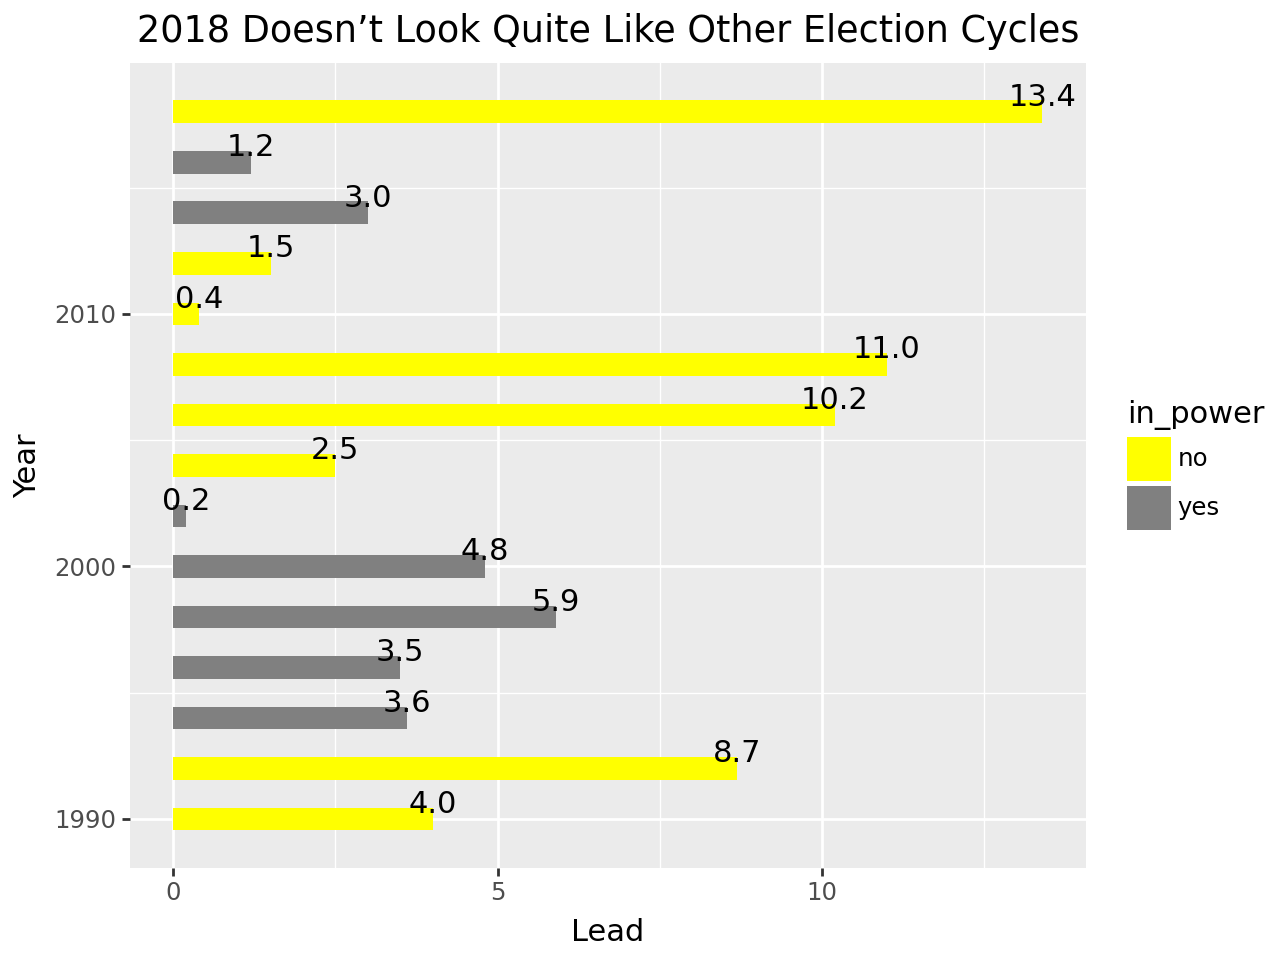

In [93]:
plot = (
ggplot(df, aes(x='year', y='lead', fill='in_power'))
    + geom_bar(stat='identity', position='dodge')
    + coord_flip()  # Flip coordinates for horizontal bars
    + labs(title='2018 Doesn’t Look Quite Like Other Election Cycles', x='Year', y='Lead')
    + scale_fill_manual(values={"yes": "grey", "no": "yellow"})
    #add the leap at the end of the bar
    + geom_text(aes(label='lead'), position=position_dodge(width=1.0), va='bottom')
)

print(plot)

/Users/renatacarlosdaou/.pyenv/versions/3.11.6/lib/python3.11/site-packages/plotnine/ggplot.py:604: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/renatacarlosdaou/.pyenv/versions/3.11.6/lib/python3.11/site-packages/plotnine/ggplot.py:605: PlotnineWarning: Filename: generic_poll_lead.svg


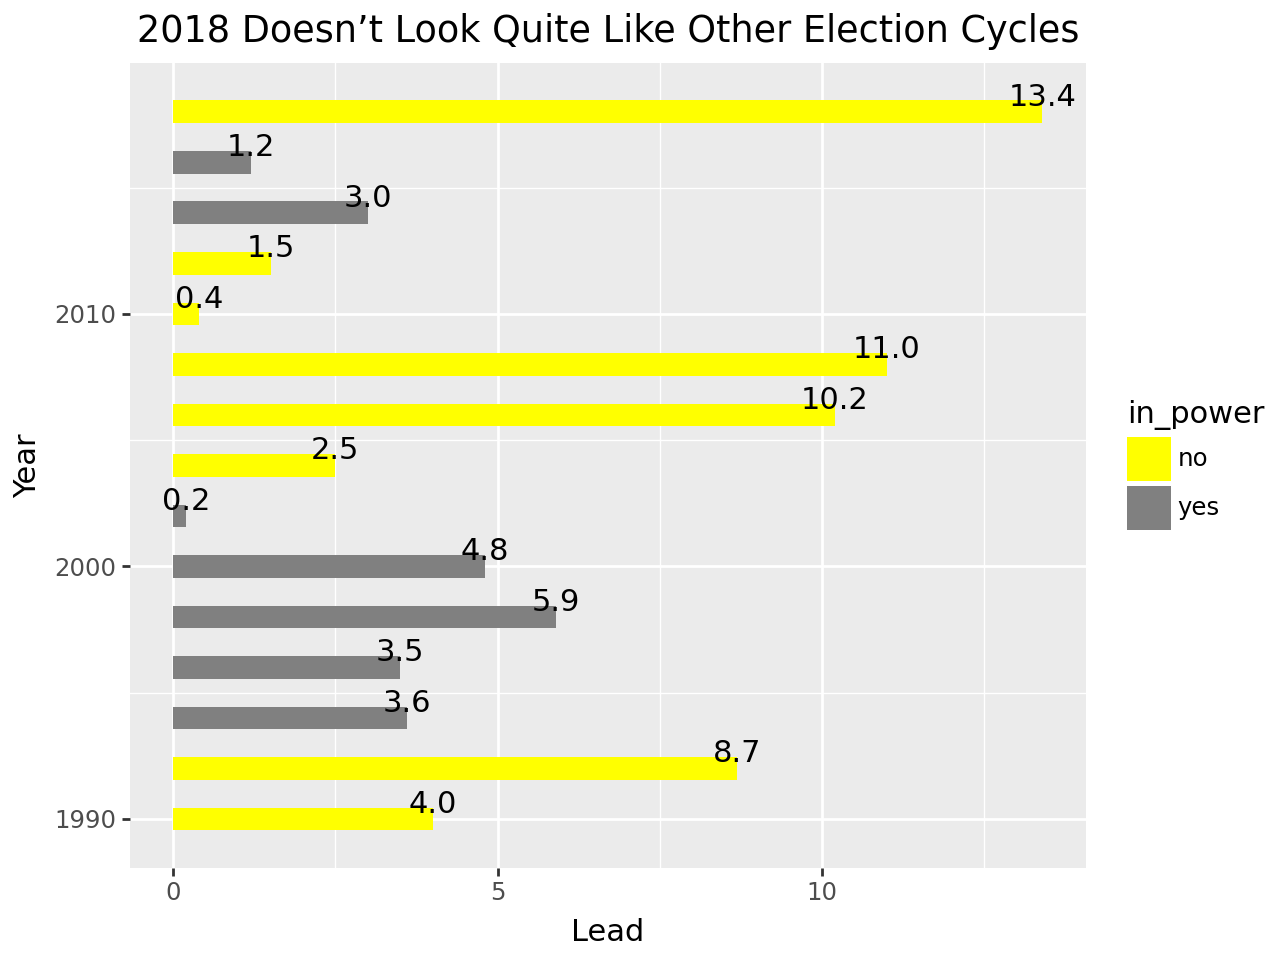

In [94]:
plot.save("generic_poll_lead.svg")
plot

# Graph 2

In [95]:
df2=pd.read_csv("data/social-spending.csv")
df2.head()

,Country,Social Spending
0,France,31.5%
1,Finland,30.8%
2,Belgium,29.0%
3,Italy,28.9%
4,Denmark,28.7%


In [105]:

# Convert 'Social Spending' from string to float
df2['Social Spending'] = df2['Social Spending'].str.rstrip('%').astype('float')

# Create the bar chart
bar_chart = alt.Chart(df2).mark_bar().encode(
    x=alt.X('Social Spending:Q', title='Social Spending as % of GDP'),
    y=alt.Y('Country:N', sort='-x', title='Country')
)

# Add text labels to the bars
text = bar_chart.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Adjust the position of the text to be slightly right of the bar start
).encode(
    text=alt.Text('Social Spending:Q', format='.1f')  # Format the text to show one decimal place
)

# Combine the bar chart and text labels
final_chart = (bar_chart + text).properties(
    title='Social Spending by Country as % of GDP'
)

# Display the chart
final_chart.display()


alt.LayerChart(...)

# Graph 3

In [99]:
df3 = pd.read_csv('data/cook_pvi.csv')
df3

,cook_pvi,pct_defeated
0,C+7 or greater,76
1,C+3 to C+7,63
2,C+1 to C+3,61
3,I+1 to C+1,35
4,I+1 to I+3,25
5,I+3 to I+5,18
6,I+5 to I+10,7
7,I+10 or greater,0


In [103]:


# Assuming df3 and its transformations exist as per your provided code

df3['remainder'] = 100 - df3['pct_defeated']

# Sort the data in descending order of 'pct_defeated'
data_cook_pvi_sorted = df3.sort_values('pct_defeated', ascending=False)

data_long_sorted = pd.melt(data_cook_pvi_sorted, id_vars='cook_pvi', value_vars=['pct_defeated', 'remainder'],
                           var_name='Type', value_name='Percentage')

# Create the stacked bar chart with modified color scheme and text alignment
stacked_chart = alt.Chart(data_long_sorted).mark_bar().encode(
    x=alt.X('sum(Percentage):Q', axis=alt.Axis(format='%'), title='Percentage of 100%'),
    y=alt.Y('cook_pvi:N', title='Cook PVI Category', sort='-x'),
    color=alt.Color('Type:N', legend=alt.Legend(title='Category'),
                    scale=alt.Scale(domain=['pct_defeated', 'remainder'], range=['purple', '#b3a2c7'])), # Purple shades
    order=alt.Order('Type:N', sort='ascending')
).properties(title='Cook PVI vs. Percentage (Stacked)')

text = stacked_chart.mark_text(
    align='left',  # Adjust text alignment here if needed
    baseline='middle',
    dx=5,  # Adjust horizontal position to ensure it's within the bar
    dy=0
).encode(
    text=alt.Text('sum(Percentage):Q', format='.1f')
)

final_chart = stacked_chart + text

final_chart.display()


alt.LayerChart(...)

---

# NYT (again): COVID weddings

You are going to recreate the simple, cleanly-annotated line graph from [this piece](https://www.nytimes.com/2021/08/13/business/economy/coronavirus-weddings-economy-.html) from the New York Times. These kind of graphs are called "stepped" line graphs.

![](images/sample-nyt-line.png)

**I've included the data:** `data/weddings.csv`.

---

# FiveThirtyEight: What makes Nigel Richards the best at Scrabble?

You are going to recreate the "Nigel Richard's Performance at Nationals" visualization from [this piece](https://fivethirtyeight.com/features/what-makes-nigel-richards-the-best-scrabble-player-on-earth/) by [Oliver Roeder](https://twitter.com/ollie). This is one of my favorite series of charts in all of history! 

*When you break them down by divisions, you **do not** need to draw the circles.*

![](images/sample-scrabble.png)

**I've included the data, but there's a little joining work to be done:** 

* `scrabble-point-spread.csv` - the points for and against each player at Nationals from one year (2013)
* `scrabble-tournament.csv` - rating and division data for each player at Nationals from one year (2013)